## The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

## Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.



In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# from matplotlib import style
import seaborn as sns
%matplotlib inline
import env
import wrangle as w

In [2]:
train, validate, test = w.wrangle_log()

In [3]:
train

date
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
             ... 
2019-12-31     95
2020-01-01    100
2020-01-02    189
2020-01-03    220
2020-01-04    106
Freq: D, Name: path, Length: 709, dtype: int64

## Prep

#### path sample by day in wrangle

<Axes: xlabel='date'>

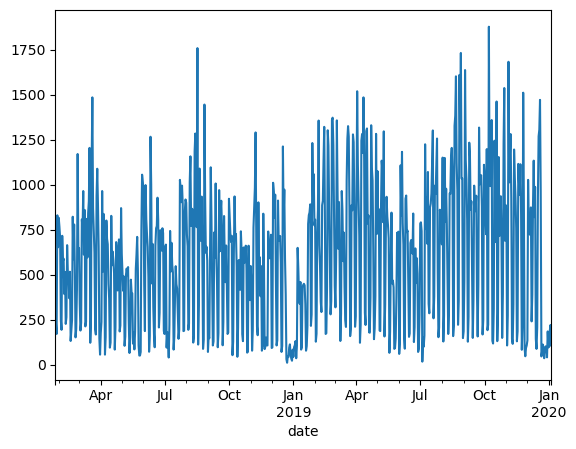

In [4]:
train.plot()

## Exponential Moving Average

#### 7 days

In [5]:
ema_7d = train.ewm(span=7).mean()
ema_7d.head()


date
2018-01-26    572.000000
2018-01-27    376.571429
2018-01-28    287.243243
2018-01-29    485.737143
2018-01-30    540.235595
Freq: D, Name: path, dtype: float64

#### 14 days

In [6]:
ema_14d = train.ewm(span=14).mean()
ema_14d.head()

date
2018-01-26    572.000000
2018-01-27    388.785714
2018-01-28    305.208829
2018-01-29    465.757252
2018-01-30    514.347700
Freq: D, Name: path, dtype: float64

#### 30 days

In [7]:
ema_30d = train.ewm(span=30).mean()
ema_30d.head()

date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: path, dtype: float64

#### 90 days

In [8]:
ema_90d = train.ewm(span=90).mean()
ema_90d.head()

date
2018-01-26    572.000000
2018-01-27    399.100000
2018-01-28    321.030081
2018-01-29    452.545042
2018-01-30    494.228442
Freq: D, Name: path, dtype: float64

#### visualize all

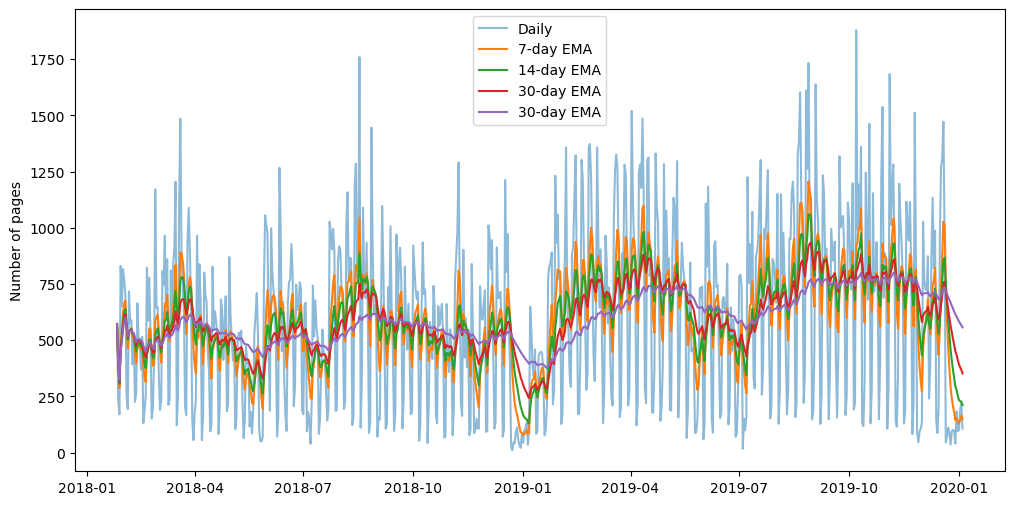

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(train.index, train, label='Daily', alpha=.5)

ax.plot(train.index, ema_7d, label = '7-day EMA')
ax.plot(train.index, ema_14d, label = '14-day EMA')
ax.plot(train.index, ema_30d, label = '30-day EMA')
ax.plot(train.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


### Midband

In [10]:
span = 30


midband = train.ewm(span=span).mean()

midband.head()


date
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: path, dtype: float64

### Upper band & Lower band

In [11]:
stdev = train.ewm(span=span).std()

stdev.head()


date
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: path, dtype: float64

In [12]:
ub = midband + stdev*3
lb = midband - stdev*3
ub


date
2018-01-26            NaN
2018-01-27    1120.791557
2018-01-28     956.773991
2018-01-29    1406.405897
2018-01-30    1354.808245
                 ...     
2019-12-31    1828.020564
2020-01-01    1781.357653
2020-01-02    1731.317187
2020-01-03    1682.145261
2020-01-04    1637.335219
Freq: D, Name: path, Length: 709, dtype: float64

In [13]:
lb

date
2018-01-26            NaN
2018-01-27    -330.191557
2018-01-28    -326.494835
2018-01-29    -492.401124
2018-01-30    -352.070116
                 ...     
2019-12-31   -1002.546378
2020-01-01    -996.236640
2020-01-02    -972.462046
2020-01-03    -943.861419
2020-01-04    -933.005173
Freq: D, Name: path, Length: 709, dtype: float64

### Bollinger Bands

In [14]:
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()


,ub,lb
date,,
2018-01-26,NaN,NaN
2018-01-27,1120.791557,-330.191557
2018-01-28,956.773991,-326.494835
2018-01-29,1406.405897,-492.401124
2018-01-30,1354.808245,-352.070116


In [15]:
df = pd.concat([train, midband, bb], axis=1)
df.columns = ['pages', 'midband', 'ub', 'lb']
df.head()


,pages,midband,ub,lb
date,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557
2018-01-28,170,315.139578,956.773991,-326.494835
2018-01-29,830,457.002386,1406.405897,-492.401124
2018-01-30,652,501.369064,1354.808245,-352.070116


### Plotting bands

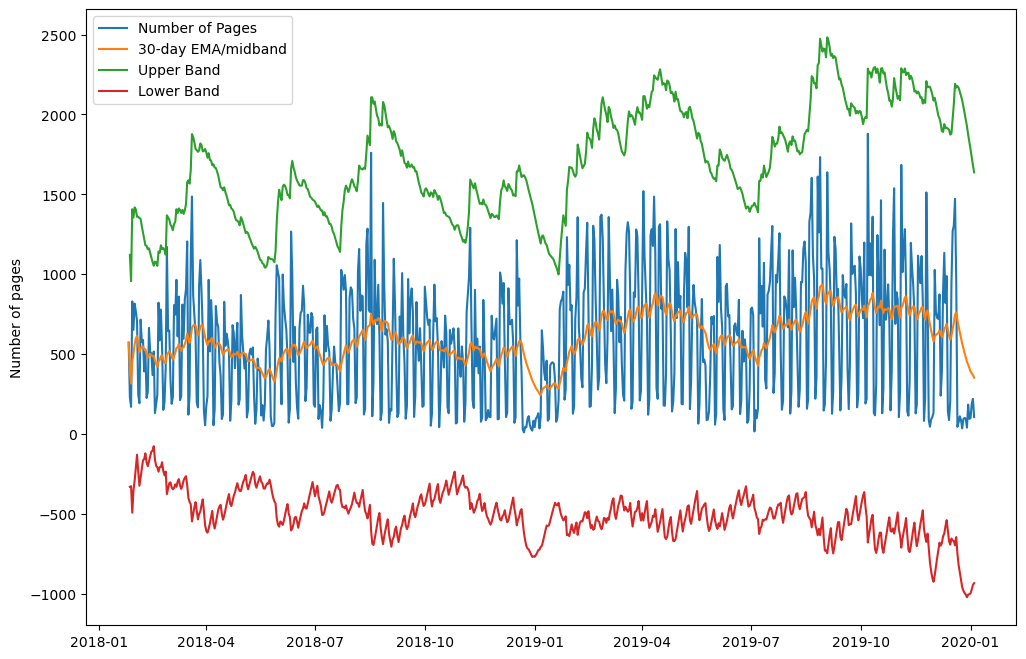

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df.index, df.pages, label='Number of Pages')

ax.plot(df.index, df.midband, label = '30-day EMA/midband')
ax.plot(df.index, df.ub, label = 'Upper Band')
ax.plot(df.index, df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


### Compute %b

In [17]:
last_measure = df.iloc[-1].pages
last_measure


106.0

In [18]:
last_lb = df.iloc[-1].lb
last_lb


-933.0051732204361

In [19]:
last_ub = df.iloc[-1].ub
last_ub


1637.335218660668

In [20]:
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))


%b for last datapoint:  0.4


### Computing for each point in time

In [21]:
df['pct_b'] = (df['pages'] - df['lb'])/(df['ub'] - df['lb'])

df.head()


,pages,midband,ub,lb,pct_b
date,,,,,
2018-01-26,572,572.000000,NaN,NaN,NaN
2018-01-27,230,395.300000,1120.791557,-330.191557,0.386077
2018-01-28,170,315.139578,956.773991,-326.494835,0.386899
2018-01-29,830,457.002386,1406.405897,-492.401124,0.696438
2018-01-30,652,501.369064,1354.808245,-352.070116,0.588249


### Search for anomalies

In [22]:
df[df['pct_b']>1]


,pages,midband,ub,lb,pct_b
date,,,,,


none

### Functions to Use

In [28]:
def acquire(file_name, column_names):
    return pd.read_csv(file_name, sep="\s", header=None, names=column_names, usecols=[0, 2, 3, 4, 5])

def prep(df, user):
    
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['path'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = train.ewm(span=span).mean()
    stdev = train.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    df = pd.concat([pages, midband, bb], axis=1)
    df.columns = ['pages', 'midband', 'ub', 'lb']
    df['pct_b'] = (df['pages'] - df['lb'])/(df['ub'] - df['lb'])
    df['user_id'] = user
    return df

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(df.index, df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(df.index, df.midband, label = 'EMA/midband')
    ax.plot(df.index, df.ub, label = 'Upper Band')
    ax.plot(df.index, df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    df = compute_pct_b(pages, span, weight, user)
    
    return df[df.pct_b>1]


In [35]:
df = w.get_log_data()

In [36]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


### Test on a single user

In [37]:
user = 1
span = 30
weight = 6
user_df = find_anomalies(df, user, span, weight)

anomalies = pd.DataFrame()
user_df = find_anomalies(df, user, span, weight)
anomalies = pd.concat([anomalies, user_df], axis=0)


### Loop through all users

In [38]:
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

### Explore Anomalies

In [ ]:
anomalies.pages.value_counts(sort=False)